# Chargement des bibliothèques

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report

from xgboost import XGBClassifier



# Chargement des données

In [33]:
df = pd.read_excel("e_commerce_data.xlsx",
                   sheet_name = 'E Comm')

df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


# Exploration et visualisation des données

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

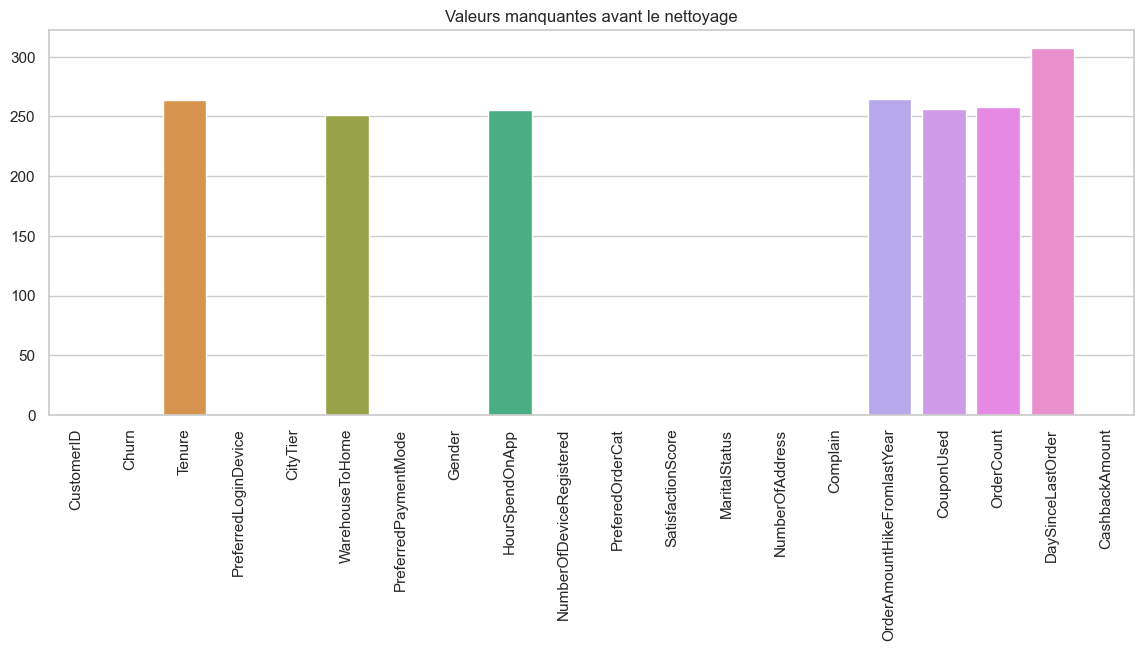

In [46]:
# Créer une figure pour le graphique
plt.figure(figsize=(14, 5))

# Barplot pour montrer le nombre de valeurs manquantes dans chaque colonne avant le nettoyage
missing_values_before = df.isnull().sum()
sns.barplot(x=missing_values_before.index, y=missing_values_before.values)

plt.title('Valeurs manquantes avant le nettoyage')
plt.xticks(rotation=90)

# Afficher le graphique
plt.show()

## Suppression des valeurs manquantes

In [47]:
df.dropna(inplace = True, axis = 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3774 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   3774 non-null   int64  
 1   Churn                        3774 non-null   int64  
 2   Tenure                       3774 non-null   float64
 3   PreferredLoginDevice         3774 non-null   object 
 4   CityTier                     3774 non-null   int64  
 5   WarehouseToHome              3774 non-null   float64
 6   PreferredPaymentMode         3774 non-null   object 
 7   Gender                       3774 non-null   object 
 8   HourSpendOnApp               3774 non-null   float64
 9   NumberOfDeviceRegistered     3774 non-null   int64  
 10  PreferedOrderCat             3774 non-null   object 
 11  SatisfactionScore            3774 non-null   int64  
 12  MaritalStatus                3774 non-null   object 
 13  NumberOfAddress   

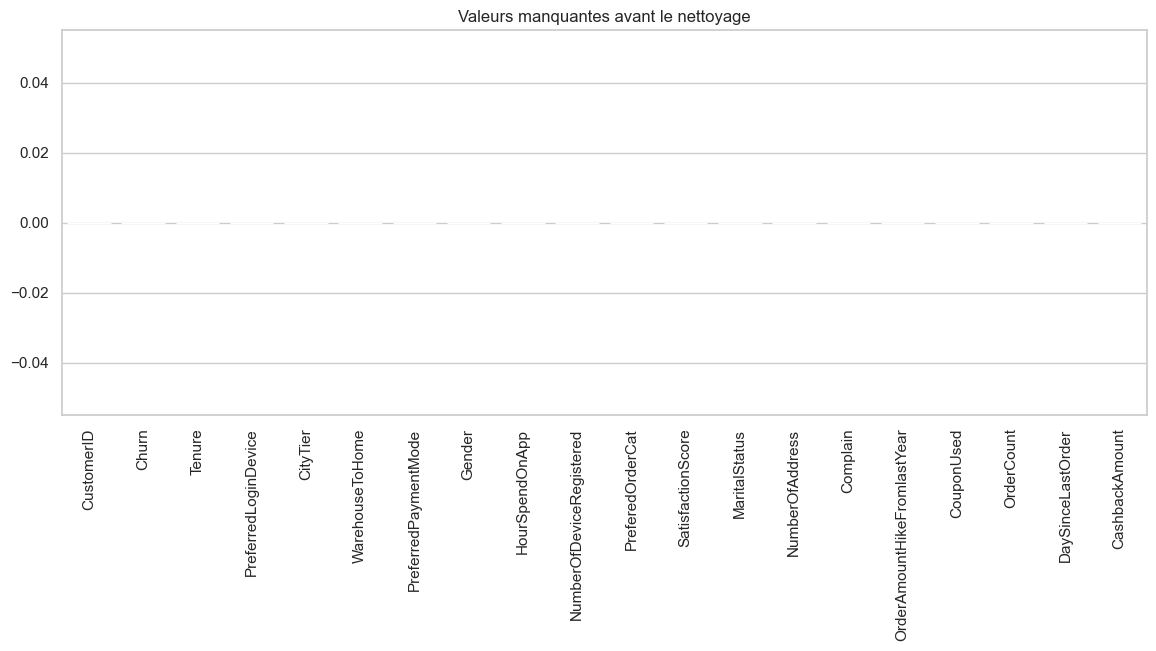

In [49]:
# Créer une figure pour le graphique
plt.figure(figsize=(14, 5))

# Barplot pour montrer le nombre de valeurs manquantes dans chaque colonne avant le nettoyage
missing_values_after = df.isnull().sum()
sns.barplot(x=missing_values_after.index, y=missing_values_after.values)

plt.title('Valeurs manquantes avant le nettoyage')
plt.xticks(rotation=90)

# Afficher le graphique
plt.show()

## Visualisation des données

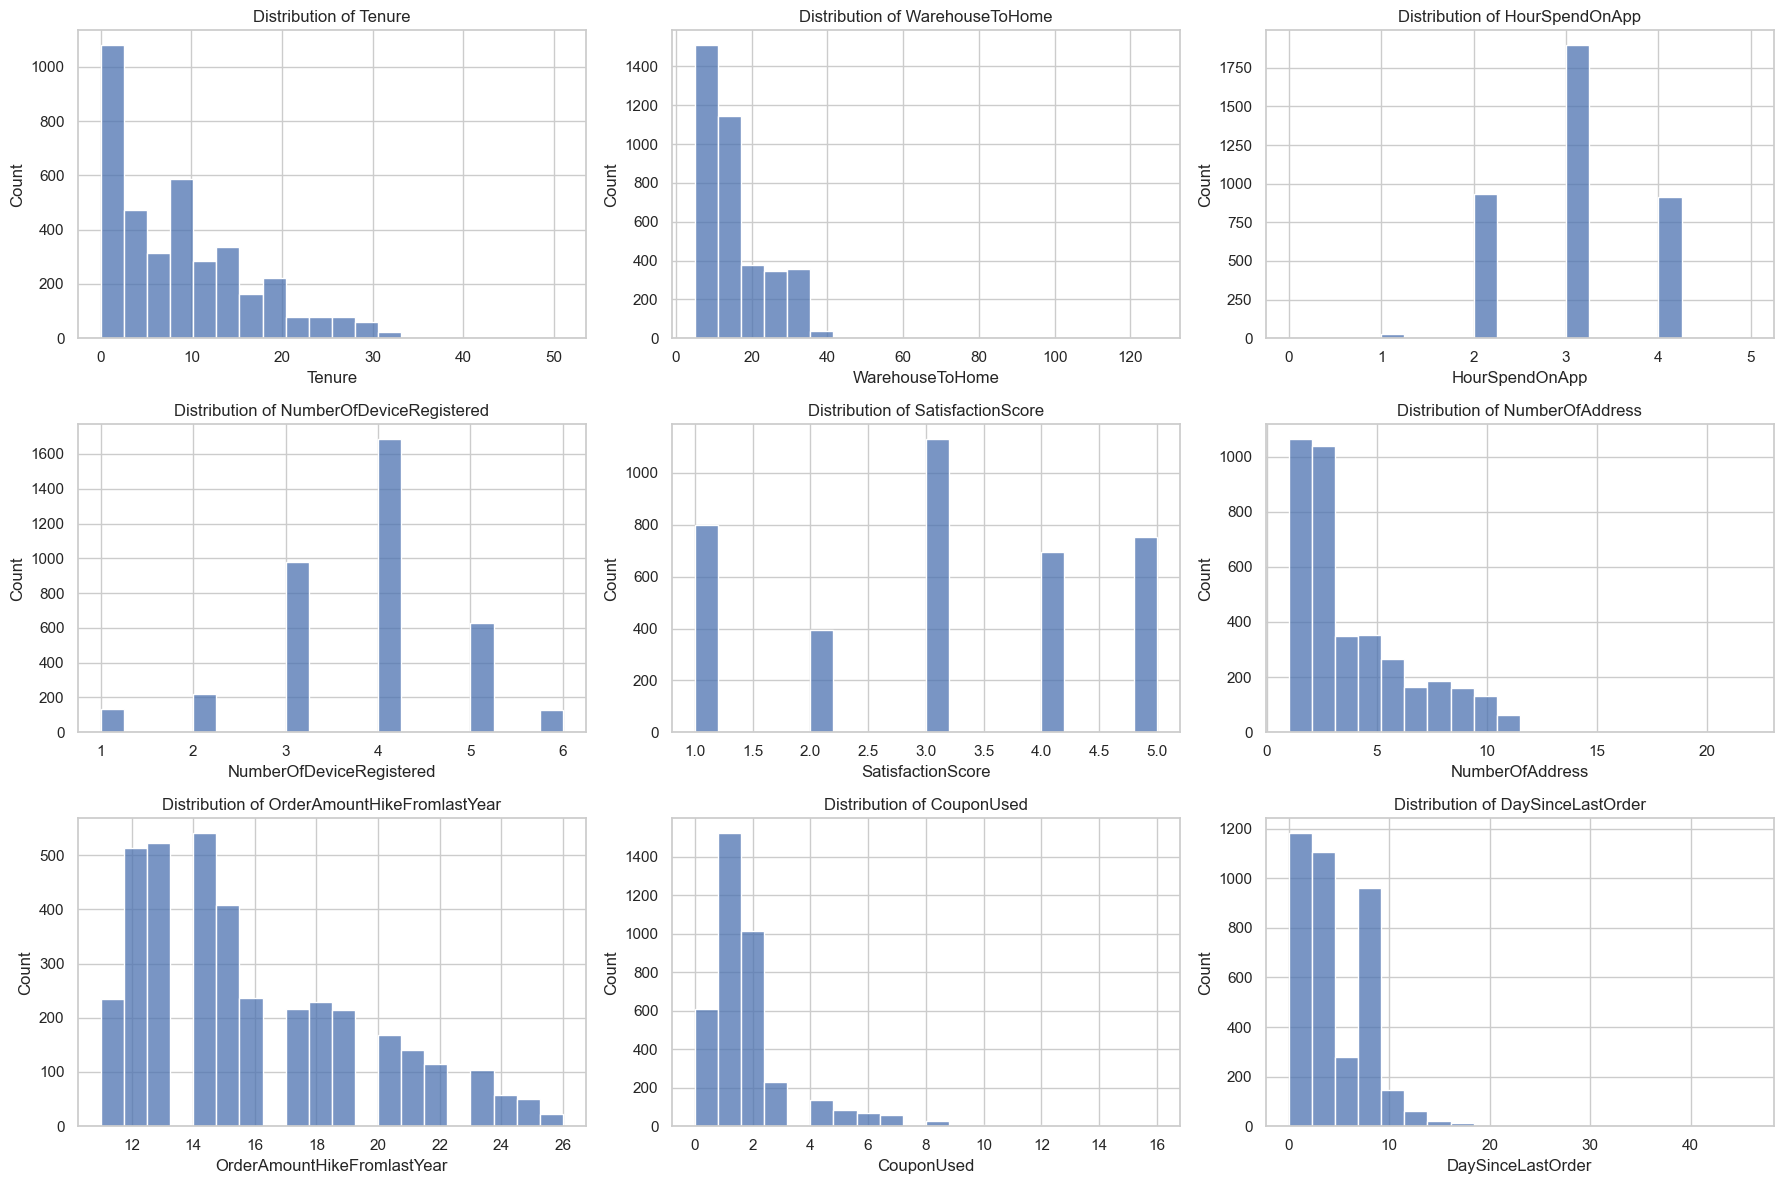

In [11]:
# Configurer le style de Seaborn
sns.set(style="whitegrid")

# Créer une figure avec plusieurs subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))

# Liste des colonnes numériques pour la visualisation
numeric_columns = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered',
                   'SatisfactionScore', 'NumberOfAddress', 'OrderAmountHikeFromlastYear',
                   'CouponUsed', 'DaySinceLastOrder']

# Boucle pour créer les histogrammes
for idx, col in enumerate(numeric_columns):
    row, col_idx = divmod(idx, 3)
    sns.histplot(df[col], bins=20, kde=False, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'Distribution of {col}')

# Ajuster le layout
plt.tight_layout()

# Afficher les graphiques
plt.show()


## Transformation des variables catégorielles en variables dummies

In [12]:
# Identifier les colonnes catégorielles dans le DataFrame
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Créer des variables dummies pour les colonnes catégorielles
df_dummies = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Afficher les premières lignes du nouveau DataFrame avec les variables dummies
df_dummies.head()


,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,...,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,50001,1,4.0,3,6.0,3.0,3,2,9,1,...,0,0,0,0,1,0,0,0,0,1
3,50004,1,0.0,3,15.0,2.0,4,5,8,0,...,0,0,1,0,1,0,0,0,0,1
5,50006,1,0.0,1,22.0,3.0,5,5,2,1,...,0,0,0,0,0,0,1,0,0,1
11,50012,1,11.0,1,6.0,3.0,4,3,10,1,...,0,0,1,0,0,0,0,0,0,1
12,50013,1,0.0,1,11.0,2.0,3,3,2,1,...,0,0,1,0,0,1,0,0,0,1


## Elimination récursive des données

In [14]:
# Séparer les variables indépendantes (X) de la variable cible (y)
X = df_dummies.drop("Churn", axis=1)
y = df_dummies["Churn"]

# Créer le modèle de régression logistique
model = LogisticRegression(max_iter=1000)

# Créer le modèle RFE avec le paramètre correct pour sélectionner 10 variables
rfe = RFE(estimator=model, n_features_to_select=10)
fit = rfe.fit(X, y)

# Afficher le classement des variables
ranking = pd.DataFrame({'Feature': X.columns, 'Ranking': fit.ranking_}).sort_values(by='Ranking')
ranking


/Users/matthieukhl/anaconda3/envs/venv1/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Feature,Ranking
14,PreferredLoginDevice_Mobile Phone,1
26,PreferedOrderCat_Mobile Phone,1
24,PreferedOrderCat_Laptop & Accessory,1
20,PreferredPaymentMode_E wallet,1
16,PreferredPaymentMode_COD,1
28,MaritalStatus_Married,1
8,Complain,1
29,MaritalStatus_Single,1
2,CityTier,1
5,NumberOfDeviceRegistered,1


Les variables avec un classement de 1 sont celles que le modèle RFE considère comme les plus importantes. Voici les 10 variables les plus importantes selon cette méthode :

PreferredLoginDevice_Mobile Phone
PreferedOrderCat_Mobile Phone
PreferedOrderCat_Laptop & Accessory
PreferredPaymentMode_E wallet
PreferredPaymentMode_COD
MaritalStatus_Married
Complain
MaritalStatus_Single
CityTier
NumberOfDeviceRegistered

## Normalisation et élimination récursive des données

In [17]:
# Normaliser les variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Réexécuter le modèle RFE avec les données normalisées
rfe_scaled = RFE(estimator=model, n_features_to_select=10)
fit_scaled = rfe_scaled.fit(X_scaled, y)

# Afficher le classement des variables avec les données normalisées
ranking_scaled = pd.DataFrame({'Feature': X.columns, 'Ranking': fit_scaled.ranking_}).sort_values(by='Ranking')
ranking_scaled

,Feature,Ranking
29,MaritalStatus_Single,1
1,Tenure,1
2,CityTier,1
24,PreferedOrderCat_Laptop & Accessory,1
5,NumberOfDeviceRegistered,1
6,SatisfactionScore,1
7,NumberOfAddress,1
8,Complain,1
12,DaySinceLastOrder,1
11,OrderCount,1


Après avoir normalisé les données et réexécuté le modèle RFE, voici les 10 variables les plus importantes selon cette méthode :

MaritalStatus_Single
Tenure
CityTier
PreferedOrderCat_Laptop & Accessory
NumberOfDeviceRegistered
SatisfactionScore
NumberOfAddress
Complain
DaySinceLastOrder
OrderCount

# Mise en place du modèle

## Séparation des données

In [19]:
# Sélectionner uniquement les variables importantes pour X
important_features = ranking_scaled[ranking_scaled['Ranking'] == 1]['Feature'].tolist()
X_important = df_dummies[important_features]

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_important, y, test_size=0.2, random_state=42)

# Afficher les dimensions des ensembles d'entraînement et de test
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3019, 10), (755, 10), (3019,), (755,))

## Entrainement du modèle

In [21]:
# Créer et entraîner le modèle de régression logistique
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

# Prédire les étiquettes de l'ensemble d'entraînement et calculer la précision
train_predictions = logistic_model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)

train_accuracy


0.8896985756873137

Le modèle de régression logistique a été entraîné avec une précision d'environ 89% sur l'ensemble d'entraînement. C'est un bon point de départ, mais il est important de noter que la performance sur l'ensemble d'entraînement ne garantit pas une bonne performance sur de nouvelles données.

## Evaluation du modèle

In [24]:
# Prédire les étiquettes de l'ensemble de test
test_predictions = logistic_model.predict(X_test)

# Calculer la précision sur l'ensemble de test
test_accuracy = accuracy_score(y_test, test_predictions)

# Créer le rapport de classification
class_report = classification_report(y_test, test_predictions)

print("Précision du test :", test_accuracy)
print(class_report)

Précision du test : 0.9019867549668874
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       648
           1       0.71      0.52      0.60       107

    accuracy                           0.90       755
   macro avg       0.82      0.74      0.77       755
weighted avg       0.89      0.90      0.90       755



La précision du modèle sur l'ensemble de test est d'environ 90%, ce qui est assez bon et similaire à la performance sur l'ensemble d'entraînement. Cela suggère que le modèle n'est pas en surapprentissage.

Voici le rapport de classification :

Precision: La précision pour la classe 0 (non-churn) est de 0,92 et pour la classe 1 (churn) est de 0,71.

Recall: Le rappel pour la classe 0 est de 0,96 et pour la classe 1 est de 0,52.

F1-score: Le score F1, qui est une moyenne harmonique de la précision et du rappel, est de 0,94 pour la classe 0 et de 0,60 pour la classe 1.

Le rapport montre que le modèle est assez bon pour prédire la classe 0 (non-churn), mais pourrait être amélioré pour la classe 1 (churn).

# Interprétation des résultats

In [25]:
# Obtenir les coefficients du modèle de régression logistique
coefficients = logistic_model.coef_[0]

# Créer un DataFrame pour stocker les variables et leurs coefficients
coeff_df = pd.DataFrame({'Feature': important_features, 'Coefficient': coefficients})

# Trier le DataFrame par l'absolu des coefficients
coeff_df['abs_coefficient'] = coeff_df['Coefficient'].abs()
coeff_df = coeff_df.sort_values(by='abs_coefficient', ascending=False)

coeff_df


,Feature,Coefficient,abs_coefficient
7,Complain,1.574266,1.574266
3,PreferedOrderCat_Laptop & Accessory,-1.190099,1.190099
0,MaritalStatus_Single,0.890078,0.890078
2,CityTier,0.435605,0.435605
4,NumberOfDeviceRegistered,0.355862,0.355862
5,SatisfactionScore,0.271667,0.271667
1,Tenure,-0.228813,0.228813
6,NumberOfAddress,0.204998,0.204998
9,OrderCount,0.158776,0.158776
8,DaySinceLastOrder,-0.087837,0.087837


Voici les coefficients du modèle pour chaque variable :

Complain: 1.57
PreferedOrderCat_Laptop & Accessory: -1.19
MaritalStatus_Single: 0.89
CityTier: 0.44
NumberOfDeviceRegistered: 0.36
SatisfactionScore: 0.27
Tenure: -0.23
NumberOfAddress: 0.20
OrderCount: 0.16
DaySinceLastOrder: -0.09

Les coefficients indiquent l'importance et la direction de l'effet de chaque variable sur la probabilité de churn. Par exemple, un coefficient positif pour "Complain" signifie que le fait de se plaindre augmente la probabilité de churn, tandis qu'un coefficient négatif pour "PreferedOrderCat_Laptop & Accessory" signifie que préférer cette catégorie diminue la probabilité de churn.

# Optimisation du modèle

In [27]:
# Définir les hyperparamètres à tester
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'penalty': ['l1', 'l2', 'elasticnet'],
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

# Créer un objet StratifiedKFold pour la validation croisée
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialiser GridSearchCV
grid_search = GridSearchCV(estimator=logistic_model, param_grid=param_grid, cv=cv, scoring='accuracy')

# Exécuter la recherche par grille sur l'ensemble d'entraînement
grid_result = grid_search.fit(X_train, y_train)

# Obtenir les meilleurs hyperparamètres
best_params = grid_result.best_params_
best_score = grid_result.best_score_

best_params, best_score

/Users/matthieukhl/anaconda3/envs/venv1/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
240 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/matthieukhl/anaconda3/envs/venv1/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/matthieukhl/anaconda3/envs/venv1/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

({'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}, 0.8877055121742282)

Il semble que certaines combinaisons d'hyperparamètres ne soient pas valides, ce qui est courant lors de l'utilisation de GridSearchCV avec des modèles complexes comme la régression logistique. Néanmoins, nous avons obtenu des résultats.

Les meilleurs hyperparamètres trouvés par GridSearchCV avec StratifiedKFold sont :


C=0.1

Penalty=l1

Solver=saga

Avec ces hyperparamètres, la meilleure précision obtenue sur les ensembles de validation est d'environ 88.8%.

## Entrainement et évaluation du nouveau modèle

In [28]:
# Créer et entraîner le modèle de régression logistique avec les meilleurs hyperparamètres
best_logistic_model = LogisticRegression(C=0.1, penalty='l1', solver='saga', max_iter=1000, random_state=42)
best_logistic_model.fit(X_train, y_train)

# Prédire les étiquettes de l'ensemble de test et calculer la précision
best_test_predictions = best_logistic_model.predict(X_test)
best_test_accuracy = accuracy_score(y_test, best_test_predictions)

# Créer le rapport de classification pour le modèle optimisé
best_class_report = classification_report(y_test, best_test_predictions)

print(best_test_accuracy)
print(best_class_report)


0.904635761589404
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       648
           1       0.75      0.49      0.59       107

    accuracy                           0.90       755
   macro avg       0.84      0.73      0.77       755
weighted avg       0.90      0.90      0.90       755



Avec les hyperparamètres optimaux, la précision du modèle sur l'ensemble de test est d'environ 90.5%, ce qui est légèrement meilleure que le modèle initial.

Voici le rapport de classification pour le modèle optimisé :

Precision: La précision pour la classe 0 (non-churn) est de 0,92 et pour la classe 1 (churn) est de 0,75.

Recall: Le rappel pour la classe 0 est de 0,97 et pour la classe 1 est de 0,49.

F1-score: Le score F1 est de 0,95 pour la classe 0 et de 0,59 pour la classe 1.

Le modèle optimisé montre une amélioration, notamment en ce qui concerne la précision pour la classe 1 (churn). Cependant, le rappel pour cette classe pourrait encore être amélioré.

# Ensemble learning : Boosting avec XGBoost

In [31]:
# Créer et configurer le modèle XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Entraîner le modèle sur l'ensemble d'entraînement
xgb_model.fit(X_train, y_train)

# Prédire les étiquettes de l'ensemble de test et calculer la précision
xgb_test_predictions = xgb_model.predict(X_test)
xgb_test_accuracy = accuracy_score(y_test, xgb_test_predictions)

# Créer le rapport de classification pour le modèle XGBoost
xgb_class_report = classification_report(y_test, xgb_test_predictions)

print("Précision avec XGBoost :", xgb_test_accuracy)
print(xgb_class_report)

Précision avec XGBoost : 0.976158940397351
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       648
           1       0.97      0.86      0.91       107

    accuracy                           0.98       755
   macro avg       0.97      0.93      0.95       755
weighted avg       0.98      0.98      0.98       755



/Users/matthieukhl/anaconda3/envs/venv1/lib/python3.11/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Avec une précision de près de 98%, le modèle XGBoost semble très performant sur l'ensemble de test. Les métriques du rapport de classification, notamment la précision, le rappel et le score F1, sont également très prometteuses pour les deux classes.

Il semble que l'utilisation de XGBoost comme technique d'ensemble learning ait été très bénéfique pour le modèle. C'est souvent le cas, car XGBoost est un algorithme puissant qui peut capturer des structures complexes dans les données.